In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df.sex = le.fit_transform(df.sex)
df.region = le.fit_transform(df.region)
df.smoker = le.fit_transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Data VIsualization

<Figure size 400x400 with 0 Axes>

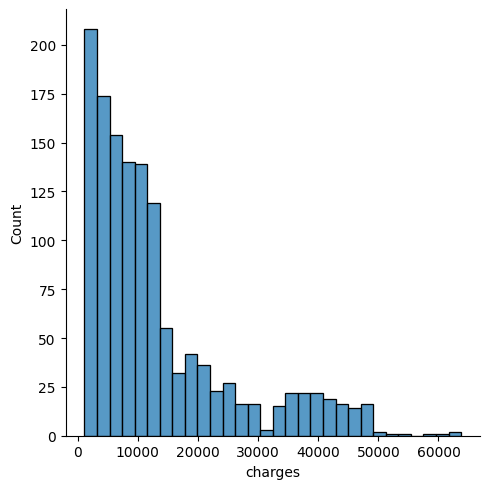

In [11]:
plt.figure(figsize=(4,4))
sns.displot(df['charges'])

<Axes: >

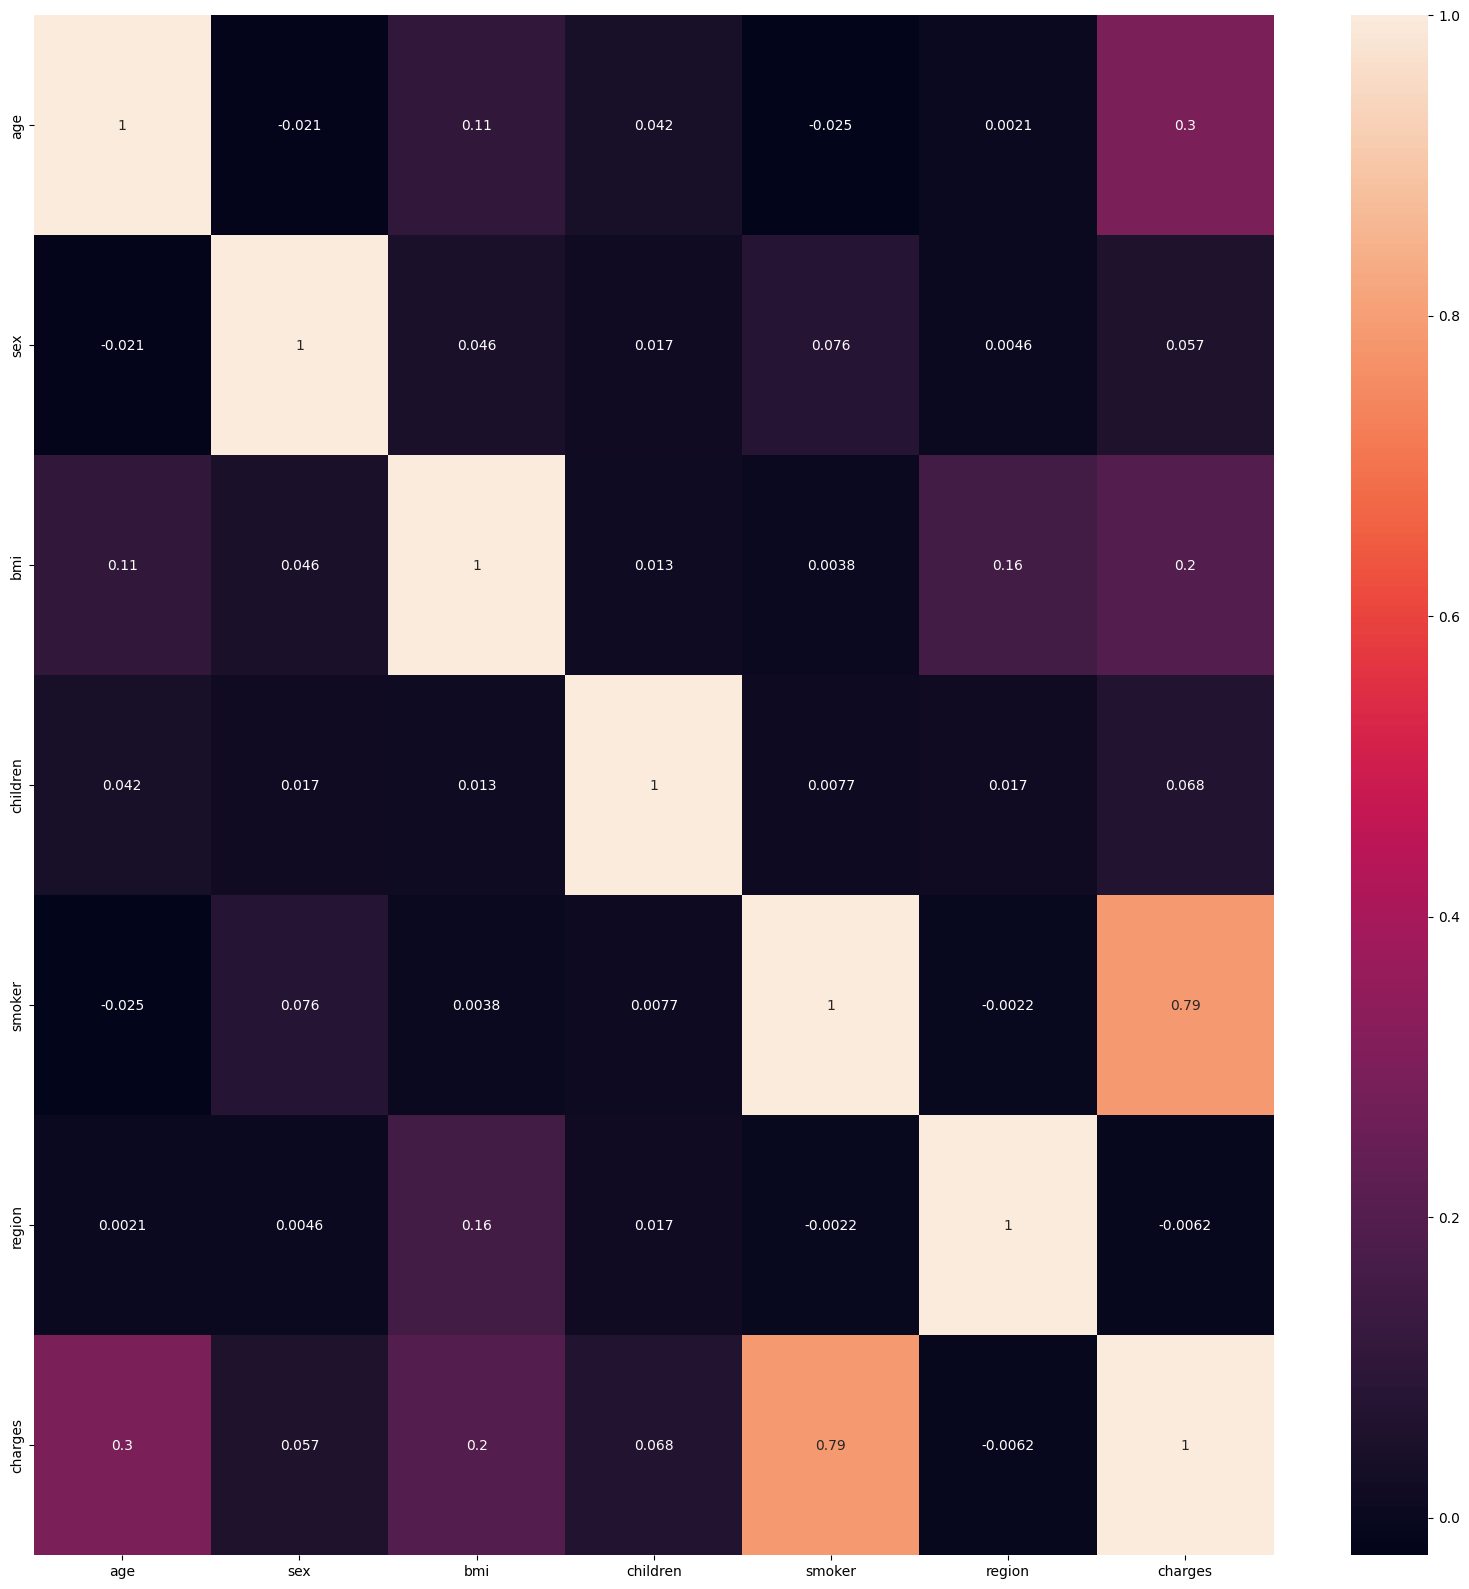

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [13]:
x = df.drop('charges',axis=1)
y = df['charges']

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=50)

In [16]:
xtrain.head()

,age,sex,bmi,children,smoker,region
69,28,1,23.980,3,1,2
852,46,0,35.530,0,1,0
771,53,0,26.700,2,0,3
33,63,1,28.310,0,0,1
168,19,0,31.825,1,0,1


In [17]:
ytrain.head()

69     17663.14420
852    42111.66470
771    11150.78000
33     13770.09790
168     2719.27975
Name: charges, dtype: float64

In [18]:
xtest.head()

,age,sex,bmi,children,smoker,region
589,38,0,30.69,1,0,2
383,35,0,43.34,2,0,2
534,64,1,40.48,0,0,2
284,52,0,31.20,0,0,3
821,26,1,17.67,0,0,1


Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
pred = reg.predict(xtest)
pred

array([ 8112.46124225, 11594.56983532, 16889.41513598, 11220.62985876,
         589.00225607, 38707.75541092, 26017.48582029,  8079.92677232,
        1456.18646633, 11829.61208756,  9694.08845846, 31612.15126333,
        7814.78220115, 30955.59602385,  7752.19117194,  9521.2380109 ,
       11555.60859326,  4754.2741024 , 11946.17658632,  8481.53878158,
       -1133.55403656, 36555.21552034,  6701.25141114,  9055.84316534,
        4250.27249914, 10900.35235321,  5896.54967537, 37301.52547002,
         533.65072479,   378.32125778, 36816.47053347,  4163.49302377,
       14652.67377116,  1578.9463929 ,  1485.15472223,  5665.89480776,
        9461.11772042,  1653.68359054, 11856.91147348, 38585.13628086,
        9482.89585217,  6739.12567066, 16686.19557475, 13302.79409957,
       35121.58969773, 13545.89793178, 33819.874757  ,  4457.09154758,
       12798.87744656,  9411.56490867, 39189.72344715,  9349.71079925,
        6458.62973987, 37626.96158359, 11678.72193578, 34615.16828537,
      

In [21]:
m = reg.coef_
m

array([  251.39431125,  -318.92989923,   302.84862867,   405.25637414,
       23155.11187846,  -160.54816743])

In [22]:
c = reg.intercept_
c

-10819.107038280532

In [37]:
acc1 = reg.score(xtest,ytest)

In [24]:
accuracy = r2_score(ytest,pred)
accuracy

0.785429999801287

In [25]:
mse1 = mean_squared_error(ytest,pred)
mse1

35195325.863506615

In [26]:
mae1 = mean_absolute_error(ytest,pred)
mae1

4052.9728730187653

KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor
ne = KNeighborsRegressor()
ne.fit(xtrain,ytrain)

KNeighborsRegressor()

In [32]:
kntest = ne.predict(xtest)
kntest

array([ 6257.52486  , 13133.66417  , 14005.41862  ,  9934.05059  ,
        9516.793768 , 30233.288022 , 11402.077432 , 14358.99065  ,
        8902.97178  , 12129.7176   ,  7135.31006  , 17565.785544 ,
        6578.67009  , 12904.67205  , 13243.757254 , 13540.78189  ,
       12740.88034  ,  4184.16942  , 11786.3972   , 20259.825826 ,
        1757.05526  , 27590.093404 , 10647.0615   , 15168.290036 ,
        7255.97253  , 14260.81809  , 10281.628766 , 16695.02016  ,
        4076.132866 ,  4097.79823  ,  7219.91503  , 10397.49634  ,
       14279.98795  ,  7824.66501  ,  5798.46294  , 10309.09008  ,
       15943.26531  ,  4924.55943  , 17823.599542 , 27177.16004  ,
       13474.6456   ,  9888.13437  , 20488.8567   , 16039.63343  ,
       11614.48282  , 20011.40722  , 13166.198422 , 13707.50381  ,
       26060.10178  , 14523.60154  , 18739.51289  , 20289.09767  ,
        3959.43158  , 26445.92662  , 10993.543228 , 16606.545354 ,
       13928.015102 ,  6307.33265  ,  5295.47258  , 22017.8915

In [36]:
acc2 = ne.score(xtest,ytest)

In [33]:
accuracy1 = r2_score(ytest,kntest)
accuracy1

0.13608483026126572

In [35]:
mse2 = mean_squared_error(ytest,kntest)
mse2

141705624.68762004

In [34]:
mae2 = mean_absolute_error(ytest,kntest)
mae2

8241.663852552734

In [38]:
data = {'Name':['KNN-R_mae','KNN-R_mse','KNN-R_accuracy','LR_mae','LR_mse','LR_accuracy'],
         'Accuracy':[mae2,mse2,acc2,mae1,mse1,acc1]}
df_for_barplot = pd.DataFrame(data=data)
df_for_barplot.head(6)

,Name,Accuracy
0,KNN-R_mae,8.241664e+03
1,KNN-R_mse,1.417056e+08
2,KNN-R_accuracy,1.360848e-01
3,LR_mae,4.052973e+03
4,LR_mse,3.519533e+07
5,LR_accuracy,7.854300e-01


<Axes: xlabel='Accuracy', ylabel='Name'>

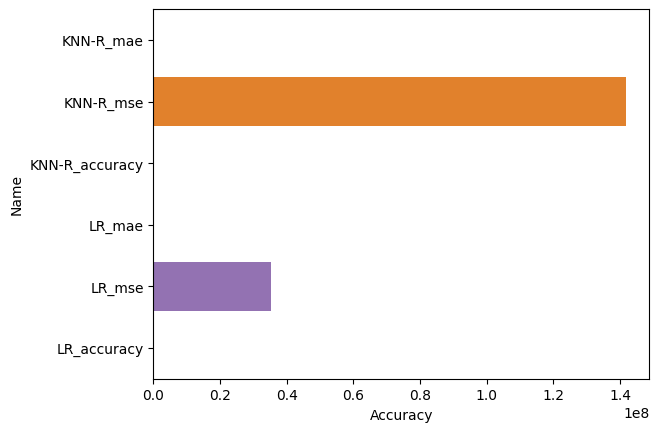

In [39]:
sns.barplot(x='Accuracy',y='Name',data=df_for_barplot)